In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digikala-dataset/comment.xlsx
/kaggle/input/digikala-dataset/product.xlsx
/kaggle/input/digikala-dataset/keifiat.xlsx
/kaggle/input/digikala-dataset/tarikhche kharid.csv
/kaggle/input/digikala-dataset/orders.csv


In [2]:
df = pd.read_excel('/kaggle/input/digikala-dataset/comment.xlsx')

In [19]:
df.tail()

,product_id,confirmed_at,comment
100003,104998,2018-07-09 21:27:12,قیمت مناسبی داره در حال حاضر . با این پول سخت ...
100004,333389,2018-07-09 21:26:52,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...
100005,356546,2018-07-09 21:26:30,من این محصول رو از بیرون تهیه کردم . و باید بگ...
100006,33874,2018-07-09 21:26:12,دوسال و.نیم پیش از دیجی کالا گرفتم. هنوز مثل ر...
100007,318278,2018-07-09 21:26:02,با استفاده از این شامپو مشکل خشکی مو و پوست سر...


In [3]:
df['confirmed_at']= pd.to_datetime(df['confirmed_at'])

In this section, you can observe the frequency of comments per hour on Digikal. The data indicates that the highest volume of comments occurs between 9:00 AM and 3:00 PM. Conversely, the early morning hours from 12:00 AM to 7:00 AM see a significantly lower number of comments. During the late afternoon and evening, from 4:00 PM to 11:00 PM, the comment activity is moderate, fluctuating between higher and lower frequencies.

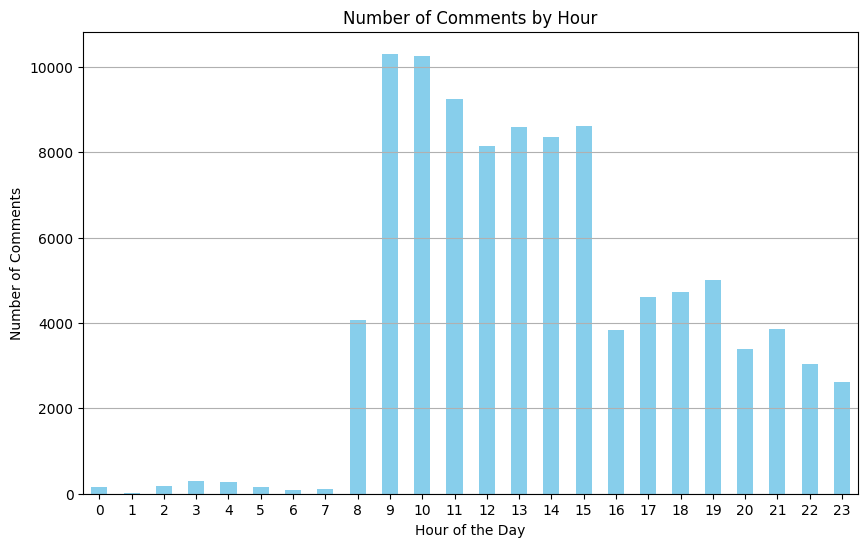

In [4]:
import matplotlib.pyplot as plt

df['hour'] = df['confirmed_at'].dt.hour

# Group by hour and count comments
hourly_comments = df.groupby('hour').size()

# Plot the results
plt.figure(figsize=(10, 6))
hourly_comments.plot(kind='bar', color='skyblue')
plt.title('Number of Comments by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [5]:
df.describe()

,product_id,confirmed_at,hour
count,100008.000000,100008,100008.000000
mean,333626.644818,2018-05-18 01:15:29.902907904,13.858371
min,281.000000,2018-03-20 09:24:03,0.000000
25%,198318.500000,2018-04-19 22:52:56.750000128,10.000000
50%,342300.000000,2018-05-15 17:11:21,13.000000
75%,474238.500000,2018-06-12 14:42:38,17.000000
max,684859.000000,2018-10-20 13:44:45,23.000000
std,163423.773178,NaN,4.270764


In [6]:
min_date = df['confirmed_at'].min()
max_date = df['confirmed_at'].max()

print(f"بازه زمانی جدول: از {min_date} تا {max_date}")

بازه زمانی جدول: از 2018-03-20 09:24:03 تا 2018-10-20 13:44:45


بازه زمانی داده ها: 29 اسفند 96 تا 28 مهر 97

In [8]:
import jdatetime
df['confirmed_at'] = pd.to_datetime(df['confirmed_at'])

# Function to convert Gregorian date to Jalali date
def gregorian_to_jalali(gregorian_date):
    jalali_date = jdatetime.datetime.fromgregorian(datetime=gregorian_date)
    return jalali_date.strftime('%Y-%m-%d %H:%M:%S')

# Apply the function to the 'confirmed_at' column
df['confirmed_at_shamsi'] = df['confirmed_at'].apply(gregorian_to_jalali)

print(df)

ModuleNotFoundError: No module named 'jdatetime'

In [3]:
product_datas = pd.read_excel('/kaggle/input/digikala-dataset/product.xlsx')

In [8]:
product_datas.describe()

,id
count,100000.000000
mean,776022.493950
std,30662.598277
min,723100.000000
25%,749416.750000
50%,776027.500000
75%,802670.250000
max,829416.000000


In [4]:
df2= pd.read_excel('/kaggle/input/digikala-dataset/product.xlsx')

In [5]:
df2

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه ...",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 می...,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-می...,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره""..."
3,727803,ست لحاف پوپلین هوبی مدل اما یکنفره چهار تکه کاوری,Hobby Emma Quilt Single Set - 4 Pieces,ست-لحاف-پوپلین-هوبی-مدل-اما-یکنفره-چهار-تکه-کاوری,روتختی اسپرت، اما، emma، روتختی یکنفره، لحاف ی...,سرویس خواب,سرویس خواب SleepSet,هوبی,Hobby,"[{""Key"":""ابعاد رو بالشی"",""Value"":""50×70""},{""Ke..."
4,725222,ماگ آبنبات رنگی مدل AR0143,NaN,ماگ-آبنبات-رنگی-مدل-ar0143,ماگ آبنبات رنگی،شذدشذشفقشدله،Mag Abnabatrangi,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,متفرقه,Miscellaneous,"[{""Key"":""در"",""Value"":""ندارد""},{""Key"":""جنس"",""Va..."
...,...,...,...,...,...,...,...,...,...,...
99995,803375,سوتین زنانه طرح گل کد 262014527,NaN,سوتین-زنانه-طرح-گل-کد-262014527,لباس زیر، کتان، سوتین، شورت و سوتین، توری، جک ...,سوتین,سوتین Women-UW-Bra,متفرقه,Miscellaneous,NaN
99996,790932,محافظ صفحه نمایش مدل نانو گلس مناسب برای گوشی ...,NaN,محافظ-صفحه-نمایش-مدل-نانو-گلس-مناسب-برای-گوشی-...,نانو گلس سامسونگ J7 Pro ، محافظ صفحه نمایش ،ن...,محافظ صفحه نمایش گوشی,محافظ صفحه نمایش گوشی Cell-Phone-Screen-Guard,متفرقه,Miscellaneous,NaN
99997,786604,تابلو نوشته تکس پیک مدل A63,NaN,تابلو-نوشته-تکس-پیک-مدل-a63,"عکس نوشته,تابلونوشته,تکستگرافی,تابلوعکس,تابلو ...",تابلو شاسی,تابلو شاسی Chassis,متفرقه,Miscellaneous,NaN
99998,799047,سینی برایتون مدل BT-8387,NaN,سینی-برایتون-مدل-bt-8387,سینی، سینی چای، sdkd ]hd,سینی,سینی Tray,برایتون,briton,NaN


In [8]:
df3=pd.read_csv('/kaggle/input/digikala-dataset/orders.csv')

In [9]:
df3

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [10]:
df3.nunique()

ID_Order                 197631
ID_Customer              151634
ID_Item                   95232
DateTime_CartFinalize    197293
Amount_Gross_Order        22416
city_name_fa                906
Quantity_item                44
dtype: int64